### 1. Bibliotecas necessárias

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk

print("Bibliotecas importadas com sucesso:","\n Pandas - ", pd.__version__, "\n NumPy -", np.__version__, "\n Matplotlib", "\n Seaborn -", sns.__version__, "\n Scikit-learn -", sk.__version__)

Bibliotecas importadas com sucesso: 
 Pandas -  2.3.2 
 NumPy - 2.3.3 
 Matplotlib 
 Seaborn - 0.13.2 
 Scikit-learn - 1.7.2


### 2. Carregamento do dataset

In [20]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,...,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,...,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,...,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,...,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,...,0,0,0,0,1,1,1,1,2.8,1


In [21]:
numero_de_linhas = len(df)
print(f"O DataFrame tem {numero_de_linhas} linhas, cada qual representando uma start-up.")

O DataFrame tem 646 linhas, cada qual representando uma start-up.


In [22]:
df.dtypes

id                            int64
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                  int64
is_biotech                    int64
is_consulting                 int64
is_othercategory              int64
has_VC                        int64
has_angel                     int64
has_roundA                  

In [23]:
df.isnull().sum()

id                            0
age_first_funding_year       35
age_last_funding_year         9
age_first_milestone_year    138
age_last_milestone_year     111
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_part

### 3. Limpeza e Tratamento de Valores Nulos (até 0,5 pt)
processo de limpeza E tratamento de valores ausentes e outliers

### 4. Codificação de Variáveis Categóricas (até 0,5 pt)

Aplicação de técnicas apropriadas de codificação para transformar variáveis categóricas em formatos utilizáveis em modelos preditivos, garantindo que a informação essencial não seja perdida no processo.

### 5. EDA: Exploração e Visualização dos Dados (até 2,0 pts)

Análise exploratória detalhada para descobrir padrões, correlações e tendências nos dados. 

**5.1 Distribuição do target**

O dataset é moderadamente desbalanceado e, se um modelo previsse sempre “sucesso”, ele já teria 64,7% de acurácia. Por isso precisaremos olhar também para precisão, recall e F1, não só acurácia.

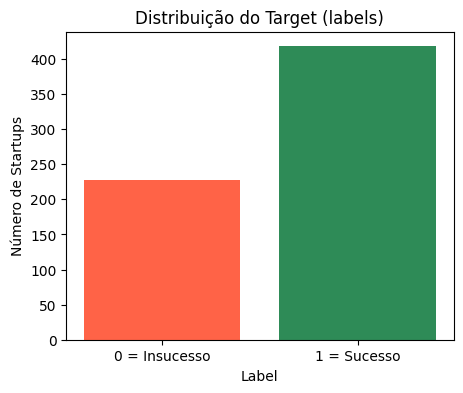

0 (insucesso): 228 startups (~35.3%)
1 (sucesso): 418 startups (~64.7%)


In [ ]:
# Contagem de cada classe
class_counts = df['labels'].value_counts().sort_index()

# Plot do gráfico
plt.figure(figsize=(5,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['tomato','seagreen'])
plt.title("Distribuição do Target (labels)")
plt.xlabel("Label")
plt.ylabel("Número de Startups")
plt.xticks([0,1], ["0 = Insucesso", "1 = Sucesso"])
plt.show()

total = len(df)
print(f"0 (insucesso): {class_counts[0]} startups (~{class_counts[0]/total:.1%})")
print(f"1 (sucesso): {class_counts[1]} startups (~{class_counts[1]/total:.1%})")

**5.2 Análise entre target e tempo até a primeira captação**

- Variável analisada: `age_first_funding_year`
- Boa forma de avaliar se existe alguma correlação entre captar investimento cedo e as chances de sucesso.
- Conclusão: Os gráficos de age_first_funding_year mostram que a maioria das startups consegue captar o primeiro investimento nos primeiros cinco anos de vida, com poucos casos tardios que se configuram como outliers; além disso, ao comparar sucesso e insucesso, percebe-se que startups bem-sucedidas tendem a captar mais cedo, com valores mais concentrados em idades menores, enquanto as de insucesso apresentam distribuição mais espalhada, sugerindo que o tempo até o primeiro funding é um fator relevante e que captar cedo está associado a maiores chances de sucesso.

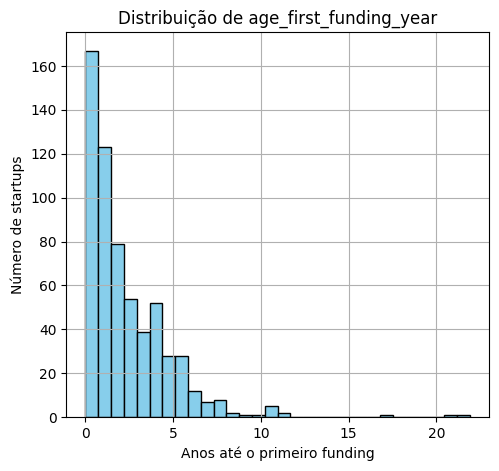

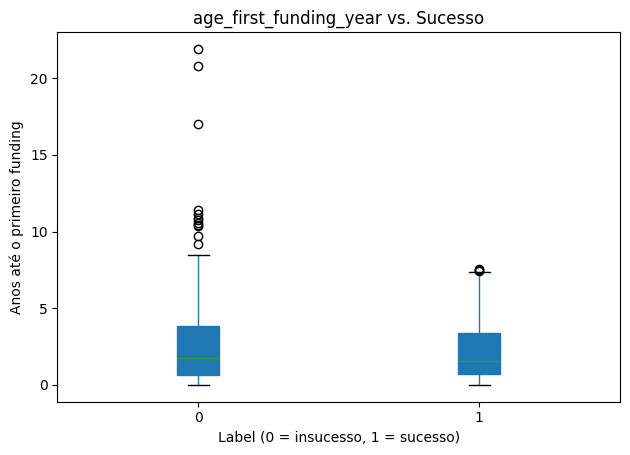

In [ ]:
col = "age_first_funding_year"

plt.figure(figsize=(12,5))

# Histograma geral
plt.subplot(1,2,1)
df[col].hist(bins=30, color="skyblue", edgecolor="black")
plt.title(f"Distribuição de {col}")
plt.xlabel("Anos até o primeiro funding")
plt.ylabel("Número de startups")

# Boxplot comparando sucesso x insucesso
df.boxplot(column=col, by="labels", grid=False, patch_artist=True)
plt.title(f"{col} vs. Sucesso")
plt.xlabel("Label (0 = insucesso, 1 = sucesso)")
plt.ylabel("Anos até o primeiro funding")

**Agrupamento do dataset com base nas rodadas de investimento e número de funcionários**

In [25]:

df_investment = df[[
    "funding_rounds", "id", "has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD", "labels", "relationships"
]]

df_investment_grouped = df_investment.groupby("funding_rounds").agg({ # função agg permite aplicar diferentes funções de agregação para diferentes colunas em um groupby.
    "id": "count",          # conta startups
    "has_VC": "sum",
    "has_angel": "sum",
    "has_roundA": "sum",
    "has_roundB": "sum",
    "has_roundC": "sum",
    "has_roundD": "sum",
    "relationships": "mean",
    "labels": "sum"
})

df_investment_grouped["labels_0"] = df_investment_grouped["id"] - df_investment_grouped["labels"]
df_investment_grouped["relationships"] = df_investment_grouped["relationships"].round(0)

df_investment_grouped = df_investment_grouped.rename(columns={"relationships": "team_size", "id": "startups", "has_VC": "VC", "has_angel": "angel", "has_roundA": "A", "has_roundB": "B","has_roundC": "C","has_roundD": "D", "labels": "unicorns", "labels_0": "non-unicorns"})

print(df_investment_grouped)

                startups  VC  angel    A   B   C   D  team_size  unicorns  \
funding_rounds                                                              
1                    207  37     48   59  22  19   9        5.0       102   
2                    199  56     63  113  85  18   4        7.0       124   
3                    124  55     34   72  75  40  13        9.0       102   
4                     66  29     11   52  53  43  13       12.0        52   
5                     34  23      9   25  24  20  12       11.0        27   
6                      6   4      0    5   4   6   3       16.0         5   
7                      8   7      3    5   6   4   4       22.0         5   
8                      2   2      0    2   2   2   1       16.0         1   

                non-unicorns  
funding_rounds                
1                        105  
2                         75  
3                         22  
4                         14  
5                          7  
6           

**Agrupamento com base em localidade e setor**

In [ ]:

df_caracteristic = df[[
"id", "is_CA", "is_NY", "is_MA", "is_TX","is_otherstate","funding_rounds",
"is_software","is_web","is_mobile","is_enterprise","is_advertising","is_gamesvideo","is_ecommerce","is_biotech","is_consulting","is_othercategory"
 ]]

df_caracteristic_grouped = df_caracteristic.groupby("funding_rounds").agg({ 
    "is_NY": "sum",
    "is_MA": "sum",
    "is_TX": "sum",
    "is_otherstate": "sum",
    "is_software": "sum",
    "is_web": "sum",
    "is_mobile": "sum",
    "is_enterprise": "sum",
    "is_advertising": "sum",
    "is_gamesvideo": "sum",
    "is_ecommerce": "sum",
    "is_biotech": "sum",
    "is_consulting": "sum",
    "is_othercategory": "sum"

})

df_caracteristic_grouped = df_caracteristic_grouped.rename(columns={
    "is_CA": "CA",
    "is_NY": "NY",
    "is_MA": "MA",
    "is_TX": "TX",
    "is_otherstate": "x", # otherstate
    "is_software": "sf", # software
    "is_web": "wb", # web
    "is_mobile": "mbl", # mobile
    "is_enterprise": "ets", # enterprise
    "is_advertising": "adv", # advertising
    "is_gamesvideo": "gmv", # gamesvideo
    "is_ecommerce": "ecm", # ecommerce
    "is_biotech": "btc", # biotech
    "is_consulting": "cst", # consulting
    "is_othercategory": "x", # othercategory
    "id": "startups"})

print(df_caracteristic_grouped)

                NY  MA  TX   x  sf  wb  mbl  ets  adv  gmv  ecm  btc  cst   x
funding_rounds                                                               
1               26   9  11  53  36  38    9    9   18   11   11    7    0  68
2               20  20   6  44  33  33   23   21   12   14    4    8    0  51
3               12  14   2  16  18  13   13   10   10    7    2    4    0  47
4                6  10   4  12  13   3    9    8    3    2    2    3    2  21
5                4   6   1   7   4   7    6    4    2    2    0    1    0   8
6                1   0   0   1   0   1    1    0    0    0    1    2    0   1
7                2   2   0   3   1   2    4    0    0    1    0    0    0   0
8                0   0   0   0   0   0    0    1    0    0    0    0    0   1


### 6. Formulação de Hipóteses (até 1,0 pt)

Formulação de três hipóteses que possam explicar os fatores que influenciam o sucesso da empresas.

### 7. Seleção de Features (até 1,0 pt)

Escolha das features mais relevantes para o modelo com base em sua análise exploratória e hipóteses formuladas.

### 8. Construção e Avaliação do Modelo (até 2,0 pts)

Seleção de um modelo de machine learning adequado (ou uma combinação de modelos) que maximize a capacidade preditiva. A avaliação deve incluir métricas como acurácia, precisão, recall, e F1-score.

### 9. Finetuning de Hiperparâmetros (até 1,0 pt)

Realização de um ajuste fino (finetuning) dos hiperparâmetros do modelo para otimizar o desempenho. Aqui estão detalhes do processo de busca e as justificativas para as escolhas feitas.